In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from keras.layers import Dense
from keras.models import Sequential

In [40]:
X,y = make_moons(n_samples=300, noise=0.05, random_state=41)

In [41]:
X.shape

(300, 2)

In [42]:
y.shape

(300,)

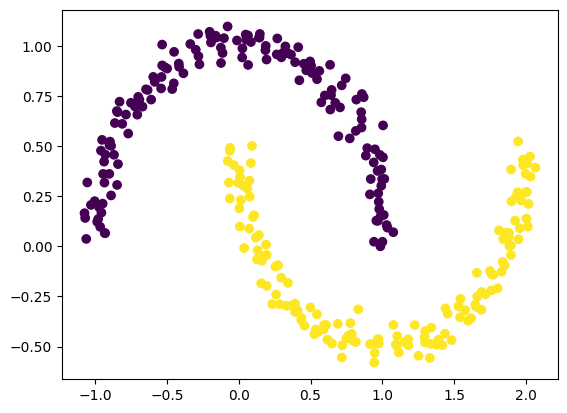

In [43]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [44]:
model = Sequential()
model.add(Dense(10, activation='sigmoid', input_dim = 2))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [45]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 10)                30        
                                                                 
 dense_17 (Dense)            (None, 10)                110       
                                                                 
 dense_18 (Dense)            (None, 10)                110       
                                                                 
 dense_19 (Dense)            (None, 10)                110       
                                                                 
 dense_20 (Dense)            (None, 10)                110       
                                                                 
 dense_21 (Dense)            (None, 10)                110       
                                                                 
 dense_22 (Dense)            (None, 10)               

In [51]:
old_weights = model.get_weights()[0]
old_weights

array([[-0.32946506,  0.61533844, -0.4444671 ,  0.5041328 , -0.05302288,
         0.6342138 , -0.25599846,  0.23725177,  0.40579098, -0.5637251 ],
       [-0.61252785, -0.61261517, -0.49665713, -0.18722138,  0.6564305 ,
        -0.3383213 , -0.17234768, -0.19883579,  0.6887345 , -0.04194289]],
      dtype=float32)

In [47]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [52]:
new_weights = model.get_weights()[0]
new_weights

array([[-0.32946506,  0.61533844, -0.4444671 ,  0.5041328 , -0.05302288,
         0.6342138 , -0.25599846,  0.23725177,  0.40579098, -0.5637251 ],
       [-0.61252785, -0.61261517, -0.49665713, -0.18722138,  0.6564305 ,
        -0.3383213 , -0.17234768, -0.19883579,  0.6887345 , -0.04194289]],
      dtype=float32)

In [49]:
xtrain, xtest, ytrain, ytest = train_test_split(X,y, test_size=0.2, random_state=41)

In [50]:
model.fit(xtrain,ytrain,epochs=5)

Epoch 1/5
8/8 [==============================] - 2s 2ms/step - loss: 0.7138 - accuracy: 0.5000
Epoch 2/5
8/8 [==============================] - 0s 4ms/step - loss: 0.7086 - accuracy: 0.5000
Epoch 3/5
8/8 [==============================] - 0s 4ms/step - loss: 0.7038 - accuracy: 0.5000
Epoch 4/5
8/8 [==============================] - 0s 4ms/step - loss: 0.7003 - accuracy: 0.5000
Epoch 5/5
8/8 [==============================] - 0s 4ms/step - loss: 0.6979 - accuracy: 0.5000


### Now we see that vanishing gradient problem occurs so to reduce this we will use shallow NN and Use relu as an activation function

In [53]:
model = Sequential()
model.add(Dense(10, activation='relu', input_dim = 2))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [54]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [57]:
model.fit(xtrain,ytrain,epochs=10)

Epoch 1/10
8/8 [==============================] - 1s 3ms/step - loss: 0.6988 - accuracy: 0.5208
Epoch 2/10
8/8 [==============================] - 0s 3ms/step - loss: 0.6888 - accuracy: 0.5542
Epoch 3/10
8/8 [==============================] - 0s 4ms/step - loss: 0.6816 - accuracy: 0.5542
Epoch 4/10
8/8 [==============================] - 0s 3ms/step - loss: 0.6751 - accuracy: 0.6875
Epoch 5/10
8/8 [==============================] - 0s 3ms/step - loss: 0.6666 - accuracy: 0.8000
Epoch 6/10
8/8 [==============================] - 0s 3ms/step - loss: 0.6555 - accuracy: 0.8667
Epoch 7/10
8/8 [==============================] - 0s 3ms/step - loss: 0.6426 - accuracy: 0.8667
Epoch 8/10
8/8 [==============================] - 0s 3ms/step - loss: 0.6282 - accuracy: 0.8667
Epoch 9/10
8/8 [==============================] - 0s 3ms/step - loss: 0.6113 - accuracy: 0.8667
Epoch 10/10
8/8 [==============================] - 0s 4ms/step - loss: 0.5914 - accuracy: 0.8667


### So we change the NN archtecture and see the loss function is updating significantly after every epoch 